## Vanishing Gradient

The vanishing gradient problem typically occurs in deep neural networks, particularly those using activation functions like the sigmoid or tanh. This problem arises when the gradients of the loss function with respect to the parameters in the earlier layers become extremely small, effectively preventing the network from learning.

To illustrate the vanishing gradient problem, we can create a deep neural network using Keras and a simple dataset We'll use the sigmoid activation function to make the problem more apparent.


In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import SGD


Random data. Targets are independent of the predictors. We are only tracking gradient. 

In [2]:
X = tf.random.normal(
    shape = [100, 4],
    mean=0.0,
    stddev=1.0
)

y = tf.random.categorical(np.log([[0.5, 0.5]]), 100)
y = tf.reshape(y, (-1, 1))  # w

In [2]:
inputs = Input(shape=(4,))
x = Dense(10, activation='sigmoid')(inputs)
for i in range(10):
    x = Dense(10, activation='sigmoid')(x)
outputs = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=outputs)

## Dont need to compile.
#model.compile(loss = 'binary_crossentropy', optimizer=Adam(0.01), metrics=['accuracy'])

In [4]:
def get_gradients(model, X, y, batch_size=1):
    with tf.GradientTape() as tape:
        predictions = model(X[:batch_size], training=True)
        loss = tf.keras.losses.binary_crossentropy(y[:batch_size], predictions)
    
    gradients = tape.gradient(loss, model.trainable_variables)
    grad_norms = [np.linalg.norm(g.numpy()) for g in gradients if g is not None]
    return gradients, grad_norms


# Plot the gradients
gradients, grad_norms = get_gradients(model, X, y)

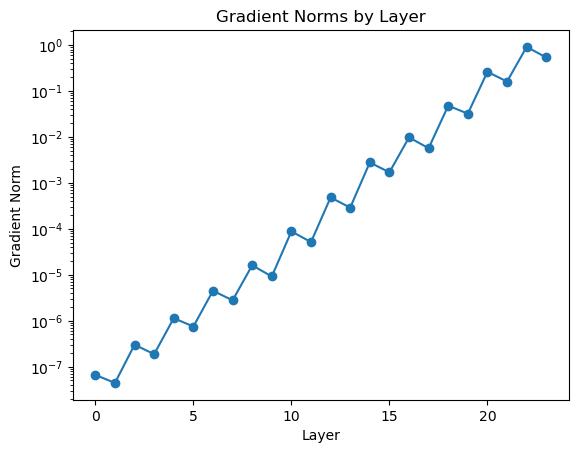

In [8]:
plt.plot(grad_norms, marker='o')
plt.title('Gradient Norms by Layer')
plt.xlabel('Layer')
plt.ylabel('Gradient Norm')
plt.yscale('log')
plt.show()

### Now try to mitigate

In [10]:
inputs = Input(shape=(4,))
x = Dense(10, activation='relu')(inputs)
for i in range(10):
    x = Dense(10, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=outputs)



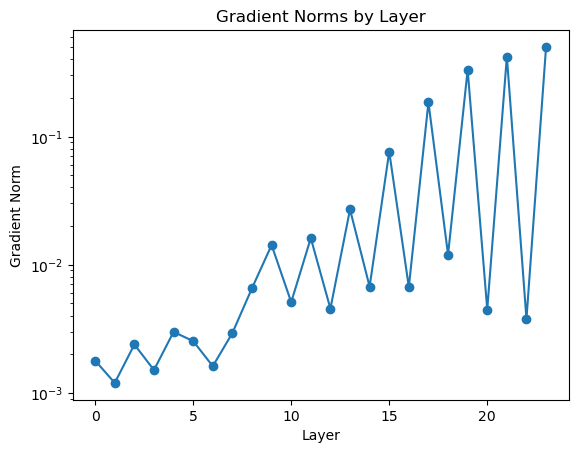

In [11]:
gradients, grad_norms = get_gradients(model, X, y)
plt.plot(grad_norms, marker='o')
plt.title('Gradient Norms by Layer')
plt.xlabel('Layer')
plt.ylabel('Gradient Norm')
plt.yscale('log')
plt.show()

gradients, grad_norms = get_gradients(model, X, y)